<a href="https://colab.research.google.com/github/davidcamilo0710/QATAR_2022_Prediction/blob/master/Modeling%2BTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDEX
- RESUME
- GROUP STAGE MODELING
  - Choosing the model
  - XGB Boost - Tuning & Hold-out Validation
  - Creating a pipeline for the XGB model
- KNOCKOUT STAGE MODELING
  - Choosing a model for the Knockout Stage
  - Random Forest - Tuning & Hold-out Validation
  - XGB Boost - Tuning & Hold-out Validation
  - Creating a pipeline for the XGB Boost model

# RESUME

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
final_df = pd.read_csv('/content/drive/MyDrive/data/training.csv')
final_df.tail()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
9316,Netherlands,Wales,10,18,1,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
9317,Poland,Belgium,26,2,0,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0
9318,Chile,Ghana,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0
9319,Japan,Tunisia,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0
9320,Korea Republic,Egypt,29,32,1,75.0,70.0,73.0,80.0,74.0,70.0,79.0,71.0


# GROUP STAGE MODELING

### Choosing a model

In [4]:
# I save the original data frame in a flag to then train the final pipeline
pipe_DF = final_df
# Dummies for categorical columns
final_df = pd.get_dummies(final_df)

I split the dataset into training, testing and validation.

In [5]:
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

 Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

Defining function to display the confusion matrix quickly.

In [7]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

* **Random Forest**

              precision    recall  f1-score   support

           0       0.49      0.62      0.55       116
           1       0.64      0.73      0.69       241
           2       0.30      0.12      0.17       110

    accuracy                           0.56       467
   macro avg       0.48      0.49      0.47       467
weighted avg       0.52      0.56      0.53       467



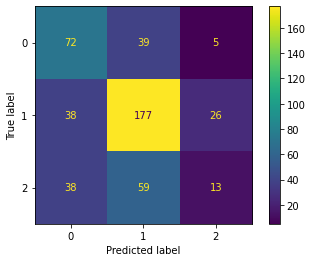

In [8]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

* **Ada Boost Classifier**

              precision    recall  f1-score   support

           0       0.45      0.50      0.47       116
           1       0.62      0.86      0.72       241
           2       0.33      0.01      0.02       110

    accuracy                           0.57       467
   macro avg       0.47      0.46      0.40       467
weighted avg       0.51      0.57      0.49       467



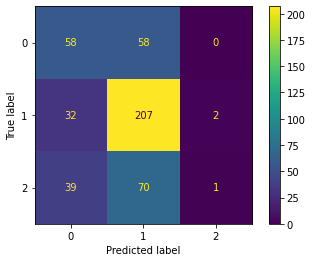

In [9]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

* **XGB Boost**

              precision    recall  f1-score   support

           0       0.46      0.57      0.51       116
           1       0.64      0.84      0.73       241
           2       0.50      0.03      0.05       110

    accuracy                           0.58       467
   macro avg       0.53      0.48      0.43       467
weighted avg       0.56      0.58      0.51       467



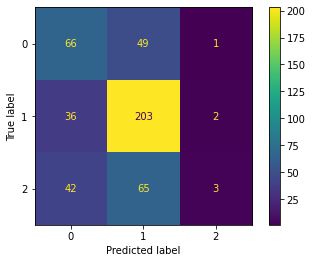

In [10]:
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

* **Neural network**



In [11]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input

X_train.shape

(8388, 404)

Epoch 1/10
210/210 [==============================] - 2s 5ms/step - loss: 1.0081 - accuracy: 0.5297 - val_loss: 0.9068 - val_accuracy: 0.5882
Epoch 2/10
210/210 [==============================] - 1s 5ms/step - loss: 0.8912 - accuracy: 0.5940 - val_loss: 0.8951 - val_accuracy: 0.5793
Epoch 3/10
210/210 [==============================] - 1s 5ms/step - loss: 0.8717 - accuracy: 0.6024 - val_loss: 0.8955 - val_accuracy: 0.5912
Epoch 4/10
210/210 [==============================] - 1s 4ms/step - loss: 0.8543 - accuracy: 0.6094 - val_loss: 0.9023 - val_accuracy: 0.5816
Epoch 5/10
210/210 [==============================] - 1s 5ms/step - loss: 0.8419 - accuracy: 0.6152 - val_loss: 0.8984 - val_accuracy: 0.5715
Epoch 6/10
210/210 [==============================] - 1s 5ms/step - loss: 0.8324 - accuracy: 0.6158 - val_loss: 0.9095 - val_accuracy: 0.5822
Epoch 7/10
210/210 [==============================] - 1s 4ms/step - loss: 0.8138 - accuracy: 0.6262 - val_loss: 0.9053 - val_accuracy: 0.5751
Epoch 

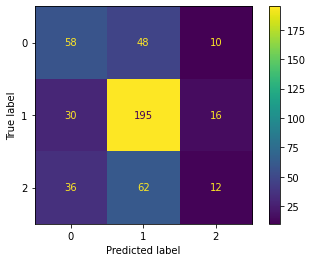

In [12]:
model = Sequential()
model.add(Input(shape=(404,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

The XGBoost model performs better than the others, so I will tune its hyperparameters and evaluate the performance based on the validation dataset.

### XGB Boost - Tuning & Hold-out Validation

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [200,250,300,350,400,450,500],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01,0.1]
}

In [14]:
# make a GridSearchCV object
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

Uncomment the following line to enable the tuning. The best result I found was: gamma = 0.01, learning_rate = 0.01, n_estimators = 300, max_depth = 4

In [15]:
#GS.fit(X_train,y_train)

To get only the best hyperparameter values

In [16]:
#print(GS.best_params_) 

Initially, I validate the model with its default parameters, and then I will validate it with its tuned parameters.

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.54      0.61      0.58       121
           1       0.65      0.87      0.74       240
           2       0.17      0.01      0.02       105

    accuracy                           0.61       466
   macro avg       0.45      0.50      0.45       466
weighted avg       0.51      0.61      0.54       466



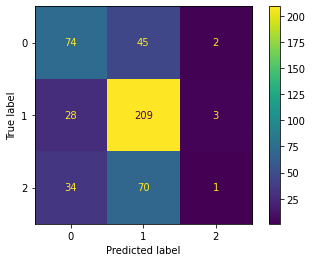

In [17]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       121
           1       0.64      0.88      0.75       240
           2       0.25      0.01      0.02       105

    accuracy                           0.62       466
   macro avg       0.49      0.51      0.45       466
weighted avg       0.54      0.62      0.54       466



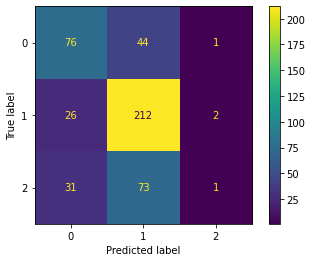

In [18]:
model = XGBClassifier(use_label_encoder = False, gamma = 0.01, learning_rate = 0.01, n_estimators = 300, max_depth = 4)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The model improves a bit, so I will create a pipe to use the model later easily.

### Creating a pipeline for the XGB model

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(use_label_encoder=False, gamma= 0.01, learning_rate= 0.01, n_estimators= 300, max_depth= 4))
pipe_League.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(gamma=0.01, learning_rate=0.01, max_depth=4,
                               n_estimators=300, objective='multi:softprob',
                               use_label_encoder=False))])

In [20]:
import joblib
joblib.dump(pipe_League,"/content/drive/MyDrive/models/groups_stage_prediction.pkl")

['/content/drive/MyDrive/models/groups_stage_prediction.pkl']

# KNOCKOUT STAGE MODELING

### Choosing the model 

Removing Draw status.

In [21]:
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [22]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

* **Ada Boost Classifier**

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       243
           1       0.81      0.86      0.84       479

    accuracy                           0.78       722
   macro avg       0.75      0.74      0.74       722
weighted avg       0.77      0.78      0.77       722



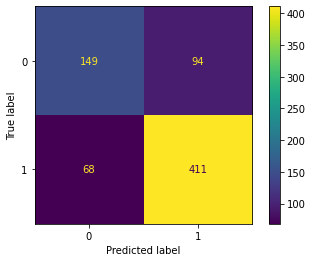

In [23]:
metrics_display(AdaBoostClassifier())

*   **Random Forest**




              precision    recall  f1-score   support

           0       0.67      0.65      0.66       243
           1       0.82      0.84      0.83       479

    accuracy                           0.77       722
   macro avg       0.75      0.74      0.74       722
weighted avg       0.77      0.77      0.77       722



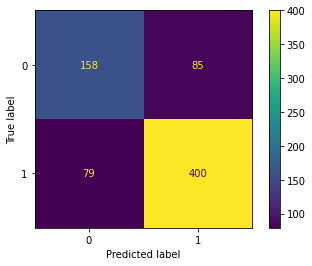

In [26]:
metrics_display(RandomForestClassifier())

* **XGB Boost**

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       243
           1       0.83      0.85      0.84       479

    accuracy                           0.78       722
   macro avg       0.76      0.75      0.75       722
weighted avg       0.78      0.78      0.78       722



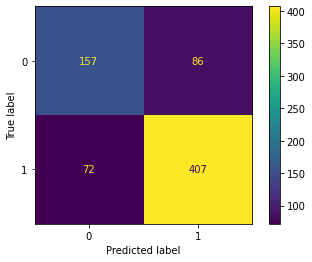

In [27]:
metrics_display(XGBClassifier(use_label_encoder=False))

* **Neural network**

In [28]:
X_train.shape

(5772, 399)

Epoch 1/10
145/145 [==============================] - 2s 5ms/step - loss: 1.0222 - accuracy: 0.6576 - val_loss: 0.5187 - val_accuracy: 0.7801
Epoch 2/10
145/145 [==============================] - 1s 4ms/step - loss: 0.5617 - accuracy: 0.7150 - val_loss: 0.5289 - val_accuracy: 0.7636
Epoch 3/10
145/145 [==============================] - 1s 4ms/step - loss: 0.5335 - accuracy: 0.7386 - val_loss: 0.5226 - val_accuracy: 0.7714
Epoch 4/10
145/145 [==============================] - 1s 4ms/step - loss: 0.5144 - accuracy: 0.7449 - val_loss: 0.4758 - val_accuracy: 0.7913
Epoch 5/10
145/145 [==============================] - 1s 4ms/step - loss: 0.4997 - accuracy: 0.7488 - val_loss: 0.4909 - val_accuracy: 0.7593
Epoch 6/10
145/145 [==============================] - 1s 4ms/step - loss: 0.5014 - accuracy: 0.7537 - val_loss: 0.4820 - val_accuracy: 0.7688
Epoch 7/10
145/145 [==============================] - 1s 5ms/step - loss: 0.4996 - accuracy: 0.7550 - val_loss: 0.4677 - val_accuracy: 0.7948
Epoch 

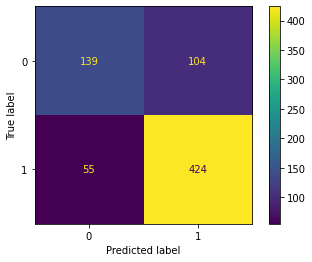

In [30]:
model = Sequential()
model.add(Input(shape=(399,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

All models have very similar performance. Therefore I will tune the Random Forest model and the XGB Boost.

### Random Forest - Tuning & Hold-out Validation 

In [31]:
search_space = {
    "max_depth" : [11,12,13,14,15,16],
    "max_leaf_nodes" : [170,180,190,200,210,220,230],
    "min_samples_leaf" : [3,4,5,6,7,8],
    "n_estimators" : [310,320,330,340,350]
}

In [32]:
GS = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

Uncomment the following lines to enable the tuning. The best result I found was: max_depth = 16, n_estimators = 320, max_leaf_nodes = 190, min_samples_leaf = 5

In [33]:
#GS.fit(X_train,y_train)

In [34]:
#print(GS.best_params_)

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       288
           1       0.77      0.80      0.78       433

    accuracy                           0.74       721
   macro avg       0.73      0.72      0.72       721
weighted avg       0.74      0.74      0.74       721



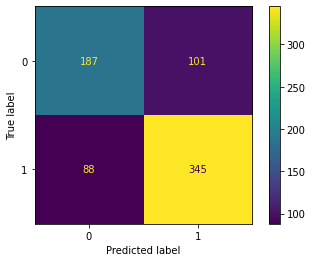

In [35]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.75      0.61      0.68       288
           1       0.77      0.86      0.81       433

    accuracy                           0.76       721
   macro avg       0.76      0.74      0.75       721
weighted avg       0.76      0.76      0.76       721



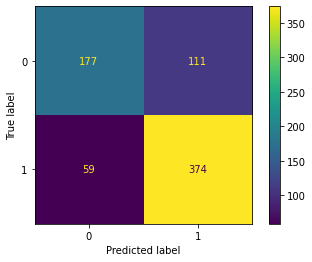

In [36]:
model = RandomForestClassifier(max_depth= 16, n_estimators=320, max_leaf_nodes= 190, min_samples_leaf= 5)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The Random Forest greatly improves performance with the tuned hyperparameters; let's see the XGB Boost model.

### XGB Boost - Tuning & Hold-out Validation

In [37]:
search_space = {
    "n_estimators" : [300,350,400,450,500,550,600],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01]
}

In [38]:
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

In [39]:
#GS.fit(X_train,y_train)

In [40]:
#print(GS.best_params_) # to get only the best hyperparameter values that we searched for

Uncomment the following lines to enable the tuning. The best result I found was: gamma = 0.01, learning_rate = 0.01, max_depth = 5, n_estimators = 500

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       288
           1       0.79      0.85      0.82       433

    accuracy                           0.77       721
   macro avg       0.77      0.75      0.76       721
weighted avg       0.77      0.77      0.77       721



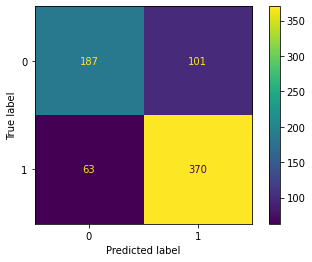

In [41]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       288
           1       0.78      0.85      0.81       433

    accuracy                           0.77       721
   macro avg       0.76      0.75      0.75       721
weighted avg       0.76      0.77      0.76       721



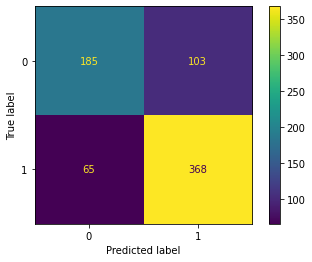

In [42]:
model = XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The model does not improve notably. However, it does improve compared to the Random Forest.

### Creating a pipeline for the XGB Boost model

In [43]:
pipe_X = pipe_knock_df.drop('Team1_Result',axis=1)
pipe_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500))
pipe_knock.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(gamma=0.01, learning_rate=0.01, max_depth=5,
                               n_estimators=500))])

In [44]:
joblib.dump(pipe_knock,"/content/drive/MyDrive/models/knockout_stage_prediction.pkl")

['/content/drive/MyDrive/models/knockout_stage_prediction.pkl']